------------

### Author comment:
You won't be able to run the whole notebook using commit button because there are too many calculations and they exceed the kernel time. Therefore while developing it, I had to run part by part and exporting to CSV finished pieces. This is a pain in neck but I wanted to do proper GridSearch on all Machine Learning techniques. 

-----------


# Digit Recognition Challange

### Start here if...
You have some experience with R or Python and machine learning basics, but you’re new to computer vision. This competition is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.

## Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Practice Skills
Computer vision fundamentals including simple neural networks

Classification methods such as SVM and K-nearest neighbors

### Acknowledgements 
More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.


## Data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783 


The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [4]:
# SET UP ENVIRONMENT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
DIR = '../input/digit-recognizer/'
train_set = pd.read_csv(DIR + 'train.csv')
print('Import finished')

Import finished


### Convert Grayscale to matplotlib format

Because pixels are saved in format int(0-255) and matplotlib plots read float point [0, 1], therefore for purpose of showing images of those numbers I need to convert them

In [13]:
# convert to matplotlib colors 
train_subset = pd.DataFrame()

for x in range(10):
    train_subset = pd.concat([train_subset, train_set.query('label == @x').head(10)], axis=0, ignore_index=True)
   
train_subset.iloc[:, 1:] = train_subset.iloc[:, 1:].applymap(lambda x: round((255 - x)/ 255, 2))

print('train_subset created')

train_subset created


## Showing the numbers

This part is done only to visualize how the pixels colors corresponds to numbers and to show couple of different handwritting to have better feel. 

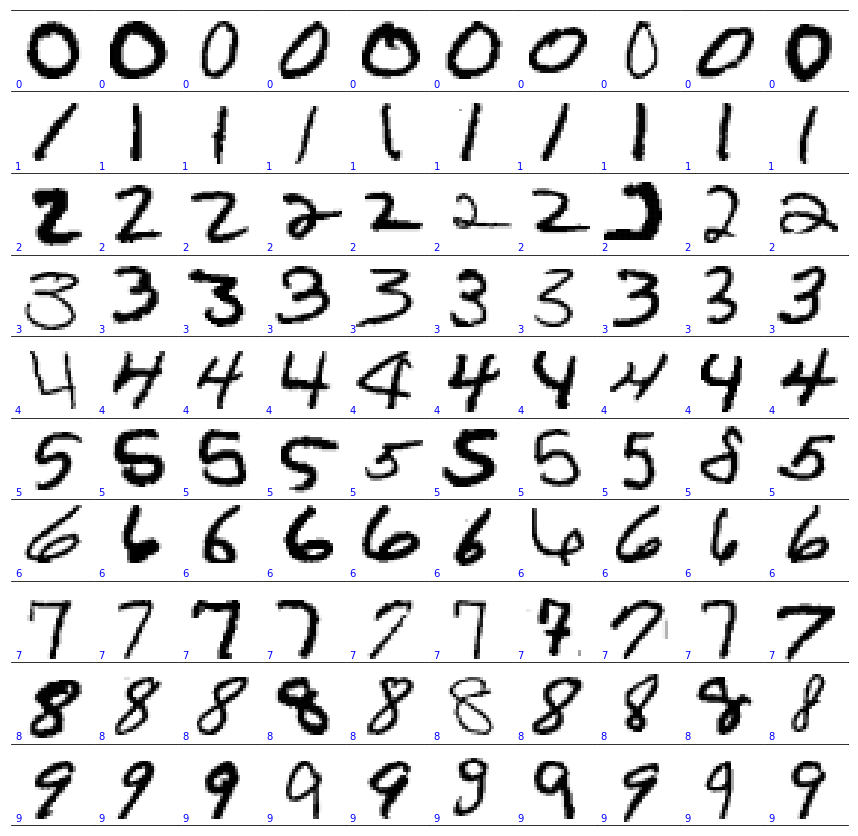

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(15, 15),
                    sharex=True, sharey=True,
                    subplot_kw={'xticks':[], 'yticks':[]},
                    gridspec_kw=dict(hspace=0, wspace=0))

for x, ax in enumerate(axes.flat):
    
    train_zero = np.empty(shape=(28, 28))
    column = 1                  # because column=0 is label
    
    for i in range(28):
        for j in range(28):
            
            train_zero[i, j] = train_subset.iloc[x, column]
            
            column += 1
    
    ax.imshow(train_zero, cmap='gray')
    ax.text(0.05, 0.05, str(train_subset.label[x]),
               transform=ax.transAxes, color='blue')
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

## Machine Learning algorithms development and assessment
Each label has 784 features which is too much for most of machine learning algorithms, therefore I will use PCA to readuce the dimensions to feasible number. Alsom because I don't kno which will give the best result I will loop ML methods through numbers: [5, 10, 20, 30, 40, 50, 75, 100].

Then I will cross_validate all most popular classification methods with default hyperparameters to get a good overlook. 

Next I will use methods with the best results and tune the hyperparameter to create a better prediction method. 

In [5]:
X =  train_set.drop('label', axis=1)
X = X/255.0
labels = train_set['label']
del train_set

print('X and labels created')

X and labels created


Text(0,0.5,'cumulative explained variance')

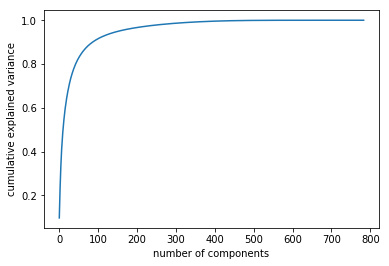

In [6]:
from sklearn.decomposition import PCA

def reduce_byPCA(df, n):
    pca = PCA(n_components=n)
    pca.fit(df)
    df = pca.transform(df)

    columns = ['pca{}'.format(x) for x in range(n)]

    return pd.DataFrame(df, columns=columns)

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [7]:
from sklearn.decomposition import PCA

import sklearn as sk
import sklearn.ensemble
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.discriminant_analysis

from xgboost import XGBClassifier



ML = [
        # Naive Bayss Methods:
        sk.naive_bayes.GaussianNB(),
        sk.naive_bayes.BernoulliNB(),
        
        # GLM:
        sk.linear_model.ElasticNetCV(),
        sk.linear_model.LarsCV(),
        sk.linear_model.LassoLarsCV(),
#        sk.linear_model.LogisticRegressionCV(),
        sk.linear_model.PassiveAggressiveRegressor(max_iter=5, tol=None),
        sk.linear_model.Perceptron(max_iter=5, tol=None),
        sk.linear_model.RidgeClassifierCV(),
        sk.linear_model.SGDClassifier(max_iter=5, tol=None),
        
        # SVM
#        sk.svm.SVC(probability=True, gamma='auto'),
        ##sk.svm.NuSVC(probability=True),
        ##sk.svm.LinearSVC(),
        
        # Ensemble methods
        sk.ensemble.RandomForestClassifier(),
#        sk.ensemble.AdaBoostClassifier(),
#        sk.ensemble.BaggingClassifier(),
        sk.ensemble.ExtraTreesClassifier(),
#        sk.ensemble.GradientBoostingClassifier(),
        
        # Tree models
        sk.tree.DecisionTreeClassifier(),
        sk.tree.ExtraTreeClassifier()
        
        #XGBoosting
#        XGBClassifier(),
        
        # KNN
#        sk.neighbors.KNeighborsClassifier(),
        #sk.neighbors.RadiusNeighborsClassifier(),
        
        # Discriminant Analysis
#        sk.discriminant_analysis.LinearDiscriminantAnalysis(),
#        sk.discriminant_analysis.QuadraticDiscriminantAnalysis()
        ]
print('MLA list created.')

MLA list created.


In [15]:
start = dt.now()

import sklearn.model_selection as model_selection
splits = 2
cv_split = model_selection.ShuffleSplit(n_splits=splits, test_size=.1, train_size=.9, random_state=8)

#for n in [25, 50, 75, 100, 125, 150]:
for n in [75, 125]:
    
    print('PCA with {} components:'.format(n))
    X_pca = reduce_byPCA(X, n)
    
    MLA_columns =  ['PCA_n', 'MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
    MLA = pd.DataFrame(columns=MLA_columns)

    X1, X2, y1, y2 = model_selection.train_test_split(X_pca, labels, test_size=0.1, train_size=0.9, random_state=0)
    #MLA_predict = labels

    for row, alg in enumerate(ML):

        cv_results = model_selection.cross_validate(alg, X_pca, labels, cv =cv_split)
        MLA.loc[row, 'PCA_n'] = n
        MLA_name = alg.__class__.__name__
        MLA.loc[row, 'MLA Name'] = MLA_name
        MLA.loc[row, 'MLA Parameters'] = str(alg.get_params())
        MLA.loc[row, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA.loc[row, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        MLA.loc[row, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

        #alg.fit(X1, y1)
        #MLA_predict[MLA_name] = alg.predict(X2)

        print('\tMLA algorithm: {} has finished in {}'.format(MLA_name, dt.now() - start))
        start = dt.now()

PCA with 75 components:
	MLA algorithm: GaussianNB has finished in 0:00:09.262848
	MLA algorithm: BernoulliNB has finished in 0:00:01.101832
	MLA algorithm: ElasticNetCV has finished in 0:00:03.410861
	MLA algorithm: LarsCV has finished in 0:00:03.789921
	MLA algorithm: LassoLarsCV has finished in 0:00:04.109640
	MLA algorithm: PassiveAggressiveRegressor has finished in 0:00:00.579958
	MLA algorithm: Perceptron has finished in 0:00:01.974799
	MLA algorithm: RidgeClassifierCV has finished in 0:00:02.448072
	MLA algorithm: SGDClassifier has finished in 0:00:02.064596
	MLA algorithm: RandomForestClassifier has finished in 0:00:08.970649
	MLA algorithm: ExtraTreesClassifier has finished in 0:00:02.509452
	MLA algorithm: DecisionTreeClassifier has finished in 0:00:18.288220
	MLA algorithm: ExtraTreeClassifier has finished in 0:00:00.305061
PCA with 125 components:
	MLA algorithm: GaussianNB has finished in 0:00:08.845368
	MLA algorithm: BernoulliNB has finished in 0:00:01.344790
	MLA algori

In [28]:
MLA.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
print(MLA.iloc[1, 2])
MLA

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


,PCA_n,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
8,125,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.895595,0.0132143,1.37501
9,125,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.89381,0.005,6.01194
6,125,Perceptron,"{'alpha': 0.0001, 'class_weight': None, 'eta0'...",0.868333,0.015,1.38097
0,125,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.867262,0.00464286,0.291863
10,125,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.860476,0.00642857,1.35899
7,125,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'clas...",0.853095,0.0135714,2.47969
11,125,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.814048,0.0135714,15.8
1,125,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.740833,0.0075,0.353794
3,125,LarsCV,"{'copy_X': True, 'cv': None, 'eps': 2.22044604...",0.584234,0.00846279,3.15193
4,125,LassoLarsCV,"{'copy_X': True, 'cv': None, 'eps': 2.22044604...",0.584234,0.00846279,3.29779


In [15]:
pd.read_csv('../input/mla-results/MLA_Results.csv')

FileNotFoundError: File b'../input/mla-results/MLA_Results.csv' does not exist

## Hyperparameter turing. 
Based on above results, I will take 10 best Machine Learning Algorithms and use GridSearch to find the best parameters in each of the method.
But first we need to create output table that will be later used to build output models and predictions.


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

MLA_AT_columns = ['pca','best1_score', 'best1_param', 'best2_score','best2_param', 'best3_score', 'best3_param']
MLA_AT = pd.DataFrame(columns=MLA_AT_columns)


In [143]:
def GridSearch_method(model, model_name, params):
    
    n_pca = 150
    X_pca = reduce_byPCA(X, n_pca)
        
    cv_split = ShuffleSplit(n_splits=10, test_size=.1, train_size=.9, random_state=8)

    clf =  GridSearchCV(model, params, cv=cv_split, return_train_score=False).fit(X_pca, labels)
   
    gs_results = pd.DataFrame(clf.cv_results_).loc[:, ['mean_test_score', 'rank_test_score', 'params']].sort_values(by='rank_test_score')
    
    MLA_AT.loc[model_name, 'pca'] = n_pca
    for rank in [1, 2, 3]:
        MLA_AT.loc[model_name, 'best{}_score'.format(rank)] = clf.cv_results_['mean_test_score'][rank -1]
        MLA_AT.loc[model_name, 'best{}_param'.format(rank)] = str(clf.cv_results_['params'][rank -1])

    print(clf.best_params_)
    return gs_results


### Model selection

#### We will tune parameters of following models:
1. KNeighborsClassifier
2.	SVC
3. QuadraticDiscriminantAnalysis
4. GradientBoostingClassifier
5. XGBClassifier
6. LogisticRegressionCV
7. SGDClassifier
8. BaggingClassifier
9. RandomForestClassifier
10. Perceptron

### K Neighbours Classifier

In [ ]:
params = {'n_neighbors' : [5, 10, 15, 20],
          'weights' : ['uniform', 'distance']}

KNN = GridSearch_method(model=sk.neighbors.KNeighborsClassifier(), 
                        model_name='sk.neighbors.KNeighborsClassifier', 
                        params=params)
KNN

### Support Vector Machines

In [ ]:
params = {'C' : [0.001, 0.01, 0.1, 1, 10],
          'gamma' : [0.001, 0.01, 0.1, 1]
         }
SVM = GridSearch_method(model=sk.svm.SVC(probability=True, gamma='auto'), 
                        model_name='sk.neighbors.KNeighborsClassifier', 
                        params=params)
SVM

### Quadratic Discriminat Analysis

In [ ]:
# here I would not need to do GridSearch because QDA doesn't have any meaningful parameters to tune. 
# But it would break my method so, I will still do it. 

params = {'tol' : [0.0, 0.1, 0.01]}
QDA = GridSearch_method(model=sk.discriminant_analysis.QuadraticDiscriminantAnalysis(), 
                        model_name='sk.discriminant_analysis.QuadraticDiscriminantAnalysis', 
                        params=params)
QDA

### GradientBoostingClassifier

In [ ]:
params = {'max_depth': [10, 25, 50], 
          'n_estimators': [200, 350, 500],                 
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

GBC = GridSearch_method(model=sk.ensemble.GradientBoostingClassifier(), 
                        model_name='sk.ensemble.GradientBoostingClassifier', 
                        params=params)
GBC

### XGBClassifier

In [ ]:
params = {'max_depth': [10, 25, 50], 
          'n_estimators': [200, 350, 500],                 
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

XGB = GridSearch_method(model=XGBClassifier(), 
                        model_name='XGBClassifier', 
                        params=params)
XGB

### LogisticRegressionCV

In [ ]:
params = {'max_depth': [10, 25, 50], 
          'n_estimators': [200, 350, 500],                 
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
          'max_iter': [10000]}

LCV = GridSearch_method(model=sk.linear_model.LogisticRegressionCV(), 
                        model_name='sk.linear_model.LogisticRegressionCV', 
                        params=params)
LCV

### SGDClassifier

In [ ]:
params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'], 
          'max_iter': [5, 10],
          'tol' : [None]}

SGD = GridSearch_method(model=sk.linear_model.SGDClassifier(), 
                        model_name='sk.linear_model.SGDClassifier', 
                        params=params)
LCV

### Bagging Classifier

In [ ]:
params = {'n_estimators' : [25, 50, 75, 125],
          'base_estimator__max_depth' : [1, 5, 10, 20],
          'max_features': [0.6, 0.8, 1.0],
          'max_samples' : [0.05, 0.1, 0.2, 0.5]}

BC = GridSearch_method(model=sk.ensemble.BaggingClassifier(), 
                        model_name='sk.ensemble.BaggingClassifier', 
                        params=params, n_pca=120)
BC

### RandomForestClassifier

In [ ]:
params = {'n_estimators' : [100, 250, 500],
          'criterion' : ['gini', 'entropy'],
          'max_features' : ['auto', 25, 50]
         }
RFC = GridSearch_method(model=sk.ensemble.RandomForestClassifier(), 
                        model_name='sk.ensemble.RandomForestClassifier', 
                        params=params)
RFC

### Perceptron

In [ ]:
params = {'penalty': ['l2', 'l1', 'elasticnet', None]}

PCP = GridSearch_method(model=sk.linear_model.Perceptron(), 
                        model_name='sk.linear_model.Perceptron', 
                        params=params)
PCP

### EXAMPLE FOR DEVELOPING CODE

In [109]:
# AdBoosting
MLA_AT = pd.DataFrame(columns=MLA_AT_columns)

params = {'n_estimators' : [10, 15, 20]}
ADA = GridSearch_method(model=sk.ensemble.AdaBoostClassifier(), 
                        model_name='sk.ensemble.AdaBoostClassifier', 
                        params=params, n_pca=120)

# Bagging Classifier
params = {'n_estimators' : [5, 10,15]}
BC = GridSearch_method(model=sk.ensemble.BaggingClassifier(), 
                        model_name='sk.ensemble.BaggingClassifier', 
                        params=params, n_pca=120)
MLA_AT 

{'n_estimators': 20}


,pca,best1_score,best1_param,best2_score,best2_param,best3_score,best3_param
sk.ensemble.AdaBoostClassifier,20,0.516667,{'n_estimators': 10},0.576429,{'n_estimators': 15},0.6325,{'n_estimators': 20}


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
DIR = 'C:\\Users\\Lenovo\\PycharmProjects\\Kaggle\\Project4_Digit_Recognition\\Separation_of_MLA_GridSearch\\'
#pd.read_csv(DIR + 'LOG.csv')

MLA_AT = pd.DataFrame()

for file in ['PCP', 'QDA', 'SGD', 'LOG']:
    MLA_AT = pd.concat([MLA_AT, pd.read_csv(DIR + 'MLA_AT_{}.csv'.format(file))], axis=0, ignore_index=True)
MLA_AT.to_csv(DIR + 'MLA_AT.csv', index=False)
MLA_AT

,model_name,pca,best1_score,best1_param,best2_score,best2_param,best3_score,best3_param
0,sk.linear_model.Perceptron,150,0.860000,{'penalty': None},0.833595,{'penalty': 'l2'},0.857429,{'penalty': 'l1'}
1,sk.discriminant_analysis.QuadraticDiscriminant...,150,0.944071,{'tol': 0.0},0.944071,{'tol': 0.1},0.944071,{'tol': 0.01}
2,sk.linear_model.SGDClassifier,150,0.889000,"{'loss': 'hinge', 'max_iter': 5, 'tol': None}",0.894595,"{'loss': 'hinge', 'max_iter': 10, 'tol': None}",0.892690,"{'loss': 'log', 'max_iter': 5, 'tol': None}"
3,sk.linear_model.LogisticRegression,150,0.873810,"{'C': 0.001, 'multi_class': 'ovr', 'penalty': ...",0.873976,"{'C': 0.001, 'multi_class': 'ovr', 'penalty': ...",0.883619,"{'C': 0.001, 'multi_class': 'multinomial', 'pe..."


# Build Predictions

In [141]:
for n in [75, 150]:
    X_train = reduce_byPCA(X, n)
    
    X_test = pd.read_csv(DIR + 'test.csv')
    X_test = X_test/255.0
    X_test = reduce_byPCA(X_test, n)
    ImageId = np.arange(1, len(X_test.index) + 1)
    
    
    for model_name in MLA_AT.index:
        for rank in [1, 2, 3]:
            params = MLA_AT.loc[model_name, 'best{}_param'.format(rank)].replace(':', '=').replace('{', '').replace('}', ''). replace("'", "")
            model = eval(model_name + '({})'.format(params))
            # create prediction
            Label = model.fit(X_train, labels).predict(X_test)
            prediction = pd.concat([pd.Series(ImageId), pd.Series(Label)], axis=1, ignore_index=True)
            prediction.columns = ['ImageId', 'Label']
            prediction_name = '{}_{}_{}.csv'.format(model_name,n ,rank)
            prediction.to_csv(prediction_name, index=False)
            print('{} ranked={} with {} PCA and params:{} has been created and exported.'.format(model_name, rank, n, params))
         
         


sk.ensemble.AdaBoostClassifier ranked=75 with 1 PCA and params:n_estimators= 10 has been created and exported.
sk.ensemble.AdaBoostClassifier ranked=75 with 2 PCA and params:n_estimators= 15 has been created and exported.
sk.ensemble.AdaBoostClassifier ranked=75 with 3 PCA and params:n_estimators= 20 has been created and exported.
sk.ensemble.BaggingClassifier ranked=75 with 1 PCA and params:n_estimators= 5 has been created and exported.
sk.ensemble.BaggingClassifier ranked=75 with 2 PCA and params:n_estimators= 10 has been created and exported.
sk.ensemble.BaggingClassifier ranked=75 with 3 PCA and params:n_estimators= 15 has been created and exported.
sk.ensemble.AdaBoostClassifier ranked=150 with 1 PCA and params:n_estimators= 10 has been created and exported.
sk.ensemble.AdaBoostClassifier ranked=150 with 2 PCA and params:n_estimators= 15 has been created and exported.
sk.ensemble.AdaBoostClassifier ranked=150 with 3 PCA and params:n_estimators= 20 has been created and exported.
sk

In [25]:
import re

dicto = str({'loss': 'log', 'max_iter': 5, 'tol': 'l2'})



match = re.match(r"^.*\'(.*)\'.*$ ",dicto)

print(match.group(1))

AttributeError: 'NoneType' object has no attribute 'group'

In [30]:
" loss= 'log', max_iter = 5, tol = 'l2 "

" loss= 'log', max_iter = 5, tol = 'l2  "

In [37]:
for keys in eval(str({'loss': 'log', 'max_iter': 5, 'tol': 'l2'})):
    print('{}={}'.format(keys, dicto[keys]))

loss=log
max_iter=5
tol=l2


In [10]:
import operator
dicto = {'A': [2, 1, 3], 'B': [100, 200, 300]}

sorted(dicto.items(), key=operator.itemgetter(0))

[('A', [2, 1, 3]), ('B', [100, 200, 300])]

In [1]:
import pandas as pd

df = pd.DataFrame({'A': [0, 10, 50, 250, 43, 21, 45, 253]})

df = df / 253.0

df

,A
0,0.000000
1,0.039526
2,0.197628
3,0.988142
4,0.169960
5,0.083004
6,0.177866
7,1.000000
